<a href="https://colab.research.google.com/github/VeeraAdhi/NM-projects/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

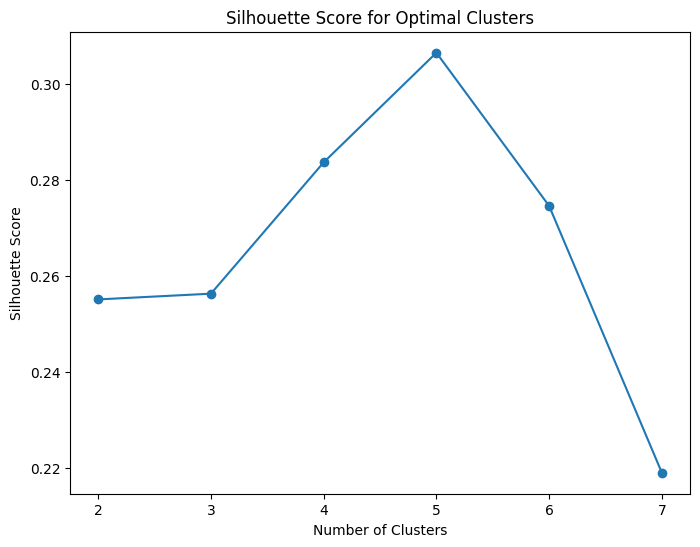

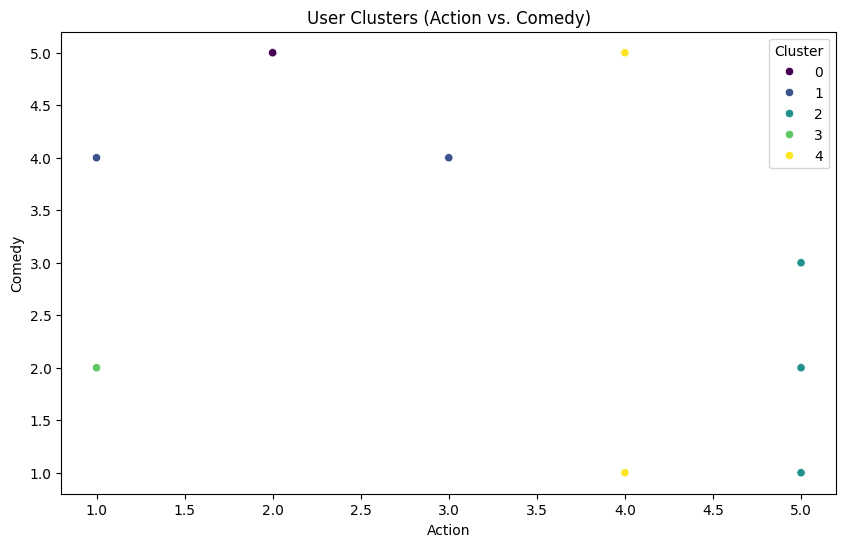

Recommendations for User 1 (Cluster 2):
Action     5.000000
SciFi      4.000000
Drama      2.333333
Comedy     2.000000
Romance    1.333333
dtype: float64
Recommendations for User 5 (Cluster 2):
Action     5.000000
SciFi      4.000000
Drama      2.333333
Comedy     2.000000
Romance    1.333333
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = {
    'User_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Action': [5, 4, 1, 2, 5, 3, 1, 4, 5, 2],
    'Comedy': [2, 5, 4, 5, 1, 4, 2, 1, 3, 5],
    'Drama': [4, 3, 5, 1, 2, 5, 4, 3, 1, 2],
    'SciFi': [3, 1, 2, 4, 5, 1, 5, 2, 4, 3],
    'Romance': [1, 5, 3, 5, 2, 2, 3, 5, 1, 4]
}

df = pd.DataFrame(data)
user_ids = df['User_ID']
df = df.drop('User_ID', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

silhouette_scores = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_clusters = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
df['User_ID'] = user_ids

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Action', y='Comedy', hue='Cluster', data=df, palette='viridis')
plt.title('User Clusters (Action vs. Comedy)')
plt.show()

def recommend_movies(user_id, df):
  user_cluster = df[df['User_ID'] == user_id]['Cluster'].values[0]
  cluster_data = df[df['Cluster'] == user_cluster].drop(['Cluster','User_ID'], axis=1)
  cluster_avg_ratings = cluster_data.mean().sort_values(ascending=False)
  print(f"Recommendations for User {user_id} (Cluster {user_cluster}):")
  print(cluster_avg_ratings)

recommend_movies(1, df)
recommend_movies(5, df)